In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [130]:
df = pd.read_csv('2018CrimeStatisticsByCategoryOfCrime.csv')
df

,Unnamed: 0,Unnamed: 1,REPORTED CASES,Unnamed: 3,Unnamed: 4,Unnamed: 5,PERFOMANCE,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,PERSONS TAKEN TO COURT,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,SENTENCES IMPOSED BY COURTS,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACCUSED CHARGED,NaN,NaN,NaN,ACCUSED CONVICTED,NaN,NaN,NaN,NaN,NaN,NaN,IMPRISONMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VICTIMS OF CRIME,NaN,NaN,NaN,VALUE PROPERTY(UGSHS.),NaN
1,NaN,NaN,Totals Cases,Cases under Inquiry,Not Detected/NPW,Cases taken to court,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,Cases pending in Court,Male Adult,Male Juven.,Female Adult,Female Juven.,Male Adult,Male Juven.,Female Adult,Female Juven.,Acquitted,Discharged,Awaiting Trial,Male Adult,Male Juven.,Female Adult,Female Juven.,Death,Fined,Probation Bound Over,CAUTION,COMM. WORK,Fines Awarded (UgShs.),Male Adult,Male Juven.,Female Adult,Female Juven.,Lost,Recovered
2,S/No.,CASE/CRIME INCIDENCES,1,2,3,4,5,6,7,8,9,10,NaN,NaN,NaN,11,NaN,NaN,NaN,12,13,14,NaN,NaN,NaN,15,16,17,18,19,20,21,NaN,NaN,NaN,22,23,24
3,NaN,HOMICIDES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Death (by shooting),190,117,29,44,74,3,1,1,39,85,-,-,-,4,-,-,-,1,1,79,4,-,-,-,-,-,-,-,-,-,197,4,17,-,"11,500,000",-
5,2,Death (by mob action),636,431,109,96,176,2,-,1,93,194,-,10,-,3,-,-,-,-,3,198,3,-,-,-,-,-,-,-,-,-,619,11,25,1,-,-
6,3,Death (Poisoning),81,54,12,15,17,-,-,-,15,9,-,9,-,-,-,-,-,-,-,18,-,-,-,-,-,-,-,-,-,-,65,9,14,4,-,-
7,4,Death (Aggravated Domestic Violence),362,107,24,231,239,15,-,2,214,208,4,73,2,7,1,6,-,-,4,269,3,1,10,-,-,-,-,-,-,-,174,25,138,16,-,-
8,5,Death(Fire Out Breaks),42,25,11,6,14,-,-,-,6,8,2,3,-,-,-,-,-,-,-,13,-,-,-,-,-,-,-,-,-,-,16,24,7,19,-,-
9,8,Other Death (Not Specified above),"3,186","1,740",626,820,"1,259",25,2,8,785,"1,062",29,126,3,27,2,-,-,3,16,"1,172",26,1,-,-,-,1,-,-,1,-,"2,475",192,473,104,"600,000",-


In [131]:
df.set_index('Unnamed: 1', inplace=True)
df.drop(columns=['Unnamed: 0'], inplace=True)
df.reset_index(inplace=True)
df.drop(df.index[0], inplace=True)
df['Unnamed: 1'].fillna('empty', inplace=True)

In [132]:
column_names = df.iloc[0]
df.columns = column_names
df.rename(columns={'empty': 'Case/ Crime incidences'}, inplace=True)
df.set_index('Case/ Crime incidences', inplace=True)
df.drop('empty', inplace=True)

In [133]:
pd.set_option('display.max_rows', 127)
pd.set_option('display.max_columns', 38)
df

1,Totals Cases,Cases under Inquiry,Not Detected/NPW,Cases taken to court,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,Cases pending in Court,Male Adult,Male Juven.,Female Adult,Female Juven.,Male Adult,Male Juven.,Female Adult,Female Juven.,Acquitted,Discharged,Awaiting Trial,Male Adult,Male Juven.,Female Adult,Female Juven.,Death,Fined,Probation Bound Over,CAUTION,COMM. WORK,Fines Awarded (UgShs.),Male Adult,Male Juven.,Female Adult,Female Juven.,Lost,Recovered
Case/ Crime incidences,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CASE/CRIME INCIDENCES,1,2,3,4,5,6,7,8,9,10,NaN,NaN,NaN,11,NaN,NaN,NaN,12,13,14,NaN,NaN,NaN,15,16,17,18,19,20,21,NaN,NaN,NaN,22,23,24
HOMICIDES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Death (by shooting),190,117,29,44,74,3,1,1,39,85,-,-,-,4,-,-,-,1,1,79,4,-,-,-,-,-,-,-,-,-,197,4,17,-,"11,500,000",-
Death (by mob action),636,431,109,96,176,2,-,1,93,194,-,10,-,3,-,-,-,-,3,198,3,-,-,-,-,-,-,-,-,-,619,11,25,1,-,-
Death (Poisoning),81,54,12,15,17,-,-,-,15,9,-,9,-,-,-,-,-,-,-,18,-,-,-,-,-,-,-,-,-,-,65,9,14,4,-,-
Death (Aggravated Domestic Violence),362,107,24,231,239,15,-,2,214,208,4,73,2,7,1,6,-,-,4,269,3,1,10,-,-,-,-,-,-,-,174,25,138,16,-,-
Death(Fire Out Breaks),42,25,11,6,14,-,-,-,6,8,2,3,-,-,-,-,-,-,-,13,-,-,-,-,-,-,-,-,-,-,16,24,7,19,-,-
Other Death (Not Specified above),"3,186","1,740",626,820,"1,259",25,2,8,785,"1,062",29,126,3,27,2,-,-,3,16,"1,172",26,1,-,-,-,1,-,-,1,-,"2,475",192,473,104,"600,000",-
Sub Total(Homicides),"4,497","2,474",811,"1,212","1,779",45,3,12,"1,152","1,566",35,221,5,41,3,6,-,4,24,"1,749",36,2,10,-,-,1,-,-,1,-,"3,546",265,674,144,"12,100,000",-


## Homicides

In [134]:
homicides_df = df.iloc[2:9]
homicides_df.reset_index(inplace=True)
homicides_df.set_index('Case/ Crime incidences', inplace=True)
homicides_df.replace("-",0, inplace=True)
homicides_df.replace(',','', regex=True, inplace=True)
coln = homicides_df.columns
for item in coln:
    homicides_df = homicides_df.astype({item: 'int64'})
homicides_df.loc["Sub Total(Homicides)"] = 0
homicides_df.loc["Sub Total(Homicides)"] = homicides_df.sum()
homicides_df

C:\Users\5CHAD3\anaconda3\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


1,Totals Cases,Cases under Inquiry,Not Detected/NPW,Cases taken to court,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,Cases pending in Court,Male Adult,Male Juven.,Female Adult,Female Juven.,Male Adult,Male Juven.,Female Adult,Female Juven.,Acquitted,Discharged,Awaiting Trial,Male Adult,Male Juven.,Female Adult,Female Juven.,Death,Fined,Probation Bound Over,CAUTION,COMM. WORK,Fines Awarded (UgShs.),Male Adult,Male Juven.,Female Adult,Female Juven.,Lost,Recovered
Case/ Crime incidences,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Death (by shooting),190,117,29,44,74,3,1,1,39,85,0,0,0,4,0,0,0,1,1,79,4,0,0,0,0,0,0,0,0,0,197,4,17,0,11500000,0
Death (by mob action),636,431,109,96,176,2,0,1,93,194,0,10,0,3,0,0,0,0,3,198,3,0,0,0,0,0,0,0,0,0,619,11,25,1,0,0
Death (Poisoning),81,54,12,15,17,0,0,0,15,9,0,9,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0,0,0,65,9,14,4,0,0
Death (Aggravated Domestic Violence),362,107,24,231,239,15,0,2,214,208,4,73,2,7,1,6,0,0,4,269,3,1,10,0,0,0,0,0,0,0,174,25,138,16,0,0
Death(Fire Out Breaks),42,25,11,6,14,0,0,0,6,8,2,3,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,16,24,7,19,0,0
Other Death (Not Specified above),3186,1740,626,820,1259,25,2,8,785,1062,29,126,3,27,2,0,0,3,16,1172,26,1,0,0,0,1,0,0,1,0,2475,192,473,104,600000,0
Sub Total(Homicides),4497,2474,811,1212,1779,45,3,12,1152,1566,35,221,5,41,3,6,0,4,24,1749,36,2,10,0,0,1,0,0,1,0,3546,265,674,144,12100000,0


## Economic crimes

In [135]:
economic_df = df.iloc[10:22]
economic_df.reset_index(inplace=True)
economic_df.set_index('Case/ Crime incidences', inplace=True)
economic_df.replace("-",0, inplace=True)
economic_df.replace(',','', regex=True, inplace=True)
coln = economic_df.columns
for item in coln:
    economic_df = economic_df.astype({item: 'int64'})
economic_df.loc["Sub Total(Economic crimes)"] = 0
economic_df.loc["Sub Total(Economic crimes)"] = economic_df.sum()


C:\Users\5CHAD3\anaconda3\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [136]:
economic_df

1,Totals Cases,Cases under Inquiry,Not Detected/NPW,Cases taken to court,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,Cases pending in Court,Male Adult,Male Juven.,Female Adult,Female Juven.,Male Adult,Male Juven.,Female Adult,Female Juven.,Acquitted,Discharged,Awaiting Trial,Male Adult,Male Juven.,Female Adult,Female Juven.,Death,Fined,Probation Bound Over,CAUTION,COMM. WORK,Fines Awarded (UgShs.),Male Adult,Male Juven.,Female Adult,Female Juven.,Lost,Recovered
Case/ Crime incidences,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Embezzlement,199,172,19,8,48,3,0,0,5,10,0,1,0,5,0,0,0,0,0,6,4,0,0,0,0,1,0,0,0,3000000,178,0,13,0,54403285118,602281000
Causing Financial losss,58,49,6,3,18,0,0,0,3,3,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,56,0,2,0,21829723334,35094000
Abuse of office,50,39,11,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,1,0,0,0,0,44,0,1,0,5589167545,487000000
Counterfeiting,541,215,159,167,244,51,1,30,85,199,1,9,1,55,1,0,0,6,41,107,26,0,0,0,0,8,0,13,9,700000,416,3,164,0,226405000,13577000
Forgeries & Uttering of Documents,898,525,186,187,378,52,5,26,104,196,0,30,0,51,0,12,0,10,31,122,37,0,2,0,0,18,0,1,5,19490000,713,3,125,0,776721600,77321000
Issuing False Cheques,344,221,80,43,142,9,0,4,30,42,0,1,0,9,0,0,0,0,4,30,2,0,0,0,0,1,0,6,0,4800000,283,0,69,0,46659863708,1369076200
Bank and Other Corporate Frauds,17,15,1,1,6,0,0,0,1,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,15,0,2,0,1075338441,42870000
Obtaining By False Pretences,12313,5776,3936,2601,4637,817,51,389,1344,2532,13,235,8,771,3,72,8,83,377,1474,491,1,28,0,0,103,1,107,123,72330000,9525,9,2807,5,121253215820,18452845505
Cyber (Computer) crimes,198,142,40,16,40,6,0,2,8,12,3,4,0,3,3,2,0,0,4,7,1,0,0,0,0,2,0,2,3,700000,149,0,51,0,610335098,23317000


## General crimes

### a) Sex related offenses

In [137]:
sex_offenses = df.iloc[24:29]
sex_offenses.reset_index(inplace=True)
sex_offenses.set_index('Case/ Crime incidences', inplace=True)
sex_offenses.replace("-",0, inplace=True)
sex_offenses.fillna(0, inplace=True)
sex_offenses.replace(',','', regex=True, inplace=True)
coln = sex_offenses.columns
for item in coln:
    sex_offenses = sex_offenses.astype({item: 'int64'})
sex_offenses.loc["Sub Total(Sex related)"] = 0
sex_offenses.loc["Sub Total(Sex related)"] = sex_offenses.sum()
sex_offenses

C:\Users\5CHAD3\anaconda3\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
C:\Users\5CHAD3\anaconda3\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


1,Totals Cases,Cases under Inquiry,Not Detected/NPW,Cases taken to court,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,Cases pending in Court,Male Adult,Male Juven.,Female Adult,Female Juven.,Male Adult,Male Juven.,Female Adult,Female Juven.,Acquitted,Discharged,Awaiting Trial,Male Adult,Male Juven.,Female Adult,Female Juven.,Death,Fined,Probation Bound Over,CAUTION,COMM. WORK,Fines Awarded (UgShs.),Male Adult,Male Juven.,Female Adult,Female Juven.,Lost,Recovered
Case/ Crime incidences,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rape,1580,618,318,644,798,16,1,7,620,584,12,0,0,12,1,0,0,1,7,575,11,0,0,0,0,0,1,0,1,0,0,0,1485,0,4016,4000
Defilement,15366,6166,3615,5585,8179,840,46,429,4270,5199,379,22,147,714,129,3,105,52,415,4329,571,10,4,3,0,40,0,191,132,27200000,0,228,0,15366,0,0
Indecent Assault,396,118,114,164,199,54,3,22,85,158,3,5,0,48,5,4,0,3,22,84,43,2,1,0,0,0,0,5,6,0,2,8,293,93,0,0
Incest,79,29,34,16,21,5,0,5,6,16,0,7,0,5,0,3,0,0,4,11,5,0,3,0,0,0,0,0,0,0,34,1,57,10,0,0
Unnatural Offences,100,30,25,45,59,5,0,10,30,42,4,1,0,5,0,0,0,0,10,32,4,0,0,0,0,0,0,1,0,0,51,40,15,0,0,0
Sub Total(Sex related),17521,6961,4106,6454,9256,920,50,473,5011,5999,398,35,147,784,135,10,105,56,458,5031,634,12,8,3,0,40,1,197,139,27200000,87,277,1850,15469,4016,4000


### b) Child related offenses

In [138]:
child_offenses_df = df.iloc[31:39]
child_offenses_df.reset_index(inplace=True)
child_offenses_df.set_index('Case/ Crime incidences', inplace=True)
child_offenses_df.replace("-",0, inplace=True)
child_offenses_df.fillna(0, inplace=True)
child_offenses_df.replace(',','', regex=True, inplace=True)
coln = child_offenses_df.columns
for item in coln:
    child_offenses_df = child_offenses_df.astype({item: 'int64'})
child_offenses_df.replace(-1,0,regex=True,inplace=True)
child_offenses_df.loc["Sub Total(Child related)"] = 0
child_offenses_df.loc["Sub Total(Child related)"] = child_offenses_df.sum()
child_offenses_df


C:\Users\5CHAD3\anaconda3\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
C:\Users\5CHAD3\anaconda3\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


1,Totals Cases,Cases under Inquiry,Not Detected/NPW,Cases taken to court,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,Cases pending in Court,Male Adult,Male Juven.,Female Adult,Female Juven.,Male Adult,Male Juven.,Female Adult,Female Juven.,Acquitted,Discharged,Awaiting Trial,Male Adult,Male Juven.,Female Adult,Female Juven.,Death,Fined,Probation Bound Over,CAUTION,COMM. WORK,Fines Awarded (UgShs.),Male Adult,Male Juven.,Female Adult,Female Juven.,Lost,Recovered
Case/ Crime incidences,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Child Neglect,6757,2499,3865,393,877,120,11,48,214,343,0,55,0,103,0,21,0,6,43,225,52,0,6,0,0,3,1,34,28,640000,0,4755,0,4206,0,0
Child Desertion,2299,752,1430,117,194,48,1,14,54,58,1,60,1,24,0,21,0,7,7,61,15,0,21,0,0,0,0,5,4,0,0,1585,0,1249,0,0
Child Stealing,245,97,95,53,77,19,1,4,29,21,1,28,4,3,0,15,3,1,5,27,5,0,13,1,0,0,0,2,0,0,0,108,0,141,0,0
Child Trafficking,84,33,25,26,39,3,0,0,23,17,0,19,2,0,0,3,1,0,0,34,0,0,3,1,0,0,0,0,0,0,0,29,0,67,0,0
Child Abduction/Kidnap,612,265,248,99,180,17,2,9,71,86,0,31,1,11,0,6,0,2,9,90,8,0,1,0,0,1,0,6,1,100000,0,214,0,461,0,0
Child Abuse/Torture,1449,445,926,78,243,28,0,4,46,62,0,16,0,25,0,3,0,0,4,46,10,0,0,0,0,1,0,6,11,3000000,0,931,0,703,0,0
Infanticide,51,13,21,17,23,4,0,3,10,1,0,15,1,0,0,4,0,0,3,10,1,0,3,0,0,0,0,0,0,0,0,34,0,20,0,0
Abortion,92,42,39,11,16,4,1,1,5,5,0,7,4,2,0,2,0,3,2,7,0,0,2,0,0,1,0,1,1,300000,0,19,0,75,0,0
Sub Total(Child related),11589,4146,6649,794,1649,243,16,83,452,593,2,231,13,168,0,75,4,19,73,500,91,0,49,2,0,6,1,54,45,4040000,0,7675,0,6922,0,0


### c) Breakings

In [139]:
breaking_df = df.iloc[41:47]
breaking_df.reset_index(inplace=True)
breaking_df.set_index('Case/ Crime incidences', inplace=True)
breaking_df.replace("-",0, inplace=True)
breaking_df.fillna(0, inplace=True)
breaking_df.replace(',','', regex=True, inplace=True)
coln = breaking_df.columns
for item in coln:
    breaking_df = breaking_df.astype({item: 'int64'})
breaking_df.loc["Sub Total(Breakings)"] = 0
breaking_df.loc["Sub Total(Breakings)"] = breaking_df.sum()
breaking_df

C:\Users\5CHAD3\anaconda3\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
C:\Users\5CHAD3\anaconda3\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


1,Totals Cases,Cases under Inquiry,Not Detected/NPW,Cases taken to court,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,Cases pending in Court,Male Adult,Male Juven.,Female Adult,Female Juven.,Male Adult,Male Juven.,Female Adult,Female Juven.,Acquitted,Discharged,Awaiting Trial,Male Adult,Male Juven.,Female Adult,Female Juven.,Death,Fined,Probation Bound Over,CAUTION,COMM. WORK,Fines Awarded (UgShs.),Male Adult,Male Juven.,Female Adult,Female Juven.,Lost,Recovered
Case/ Crime incidences,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Burglaries,6867,2256,1511,3100,3906,851,50,641,1558,3286,141,82,11,876,43,27,1,76,699,1798,735,9,13,0,0,30,2,62,96,13768000,5126,54,1712,8,14896936673,1449951500
House Breakings,3368,1038,693,1637,1933,471,32,321,813,1641,98,64,6,449,23,16,0,52,364,905,355,4,12,0,0,16,1,38,62,6288000,2482,20,833,29,3935352209,545307100
Shop Breaking,2000,670,390,940,1224,231,21,181,507,1128,42,24,4,267,7,6,0,31,203,684,226,5,5,0,0,6,1,10,27,6800000,1623,11,421,16,5055172360,705691500
Office Breaking,447,223,84,140,210,37,0,23,80,185,4,7,0,40,1,0,0,0,26,129,29,1,0,0,0,3,0,3,5,150000,369,1,77,8,3956916645,410679400
"Other Breakings (garage ,etc )",1336,368,264,704,818,192,10,145,357,870,35,19,2,218,10,2,0,34,181,481,179,4,1,0,0,8,0,15,23,2200000,1051,3,272,3,9121558001,781194100
Sub Total(Breakings),14018,4555,2942,6521,8091,1782,113,1311,3315,7110,320,196,23,1850,84,51,1,193,1473,3997,1524,23,31,0,0,63,4,128,213,29206000,10651,89,3315,64,36965935888,3892823600


### d) Thefts

In [140]:
thefts_df = df.iloc[48:64]
thefts_df.reset_index(inplace=True)
thefts_df.set_index('Case/ Crime incidences', inplace=True)
thefts_df.replace("-",0, inplace=True)
thefts_df.fillna(0, inplace=True)
thefts_df.replace(',','', regex=True, inplace=True)
coln = thefts_df.columns
for item in coln:
    thefts_df = thefts_df.astype({item: 'int64'})
thefts_df.loc["Sub Total(Thefts)"] = 0
thefts_df.loc["Sub Total(Thefts)"] = thefts_df.sum()
thefts_df

C:\Users\5CHAD3\anaconda3\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
C:\Users\5CHAD3\anaconda3\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


1,Totals Cases,Cases under Inquiry,Not Detected/NPW,Cases taken to court,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,Cases pending in Court,Male Adult,Male Juven.,Female Adult,Female Juven.,Male Adult,Male Juven.,Female Adult,Female Juven.,Acquitted,Discharged,Awaiting Trial,Male Adult,Male Juven.,Female Adult,Female Juven.,Death,Fined,Probation Bound Over,CAUTION,COMM. WORK,Fines Awarded (UgShs.),Male Adult,Male Juven.,Female Adult,Female Juven.,Lost,Recovered
Case/ Crime incidences,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Theft of Motor Vehicles,1200,682,265,253,545,51,6,33,163,305,0,5,0,59,0,4,0,8,37,202,40,0,3,0,0,7,0,11,2,23800000,1064,1,151,0,31128827744,8385794744
Theft of Motor Cycles,4612,2144,956,1512,2195,341,28,228,915,1664,18,17,0,355,8,2,1,39,243,1051,301,4,1,0,0,20,0,33,7,23850000,4278,15,316,1,13101107265,3611562000
Theft from M/Vs (Spares),1093,467,259,367,515,105,6,48,208,410,12,5,0,110,3,2,0,8,52,252,79,1,1,0,0,5,0,10,19,1600000,961,5,115,8,28510074488,463875000
Theft from M/Vs (property),597,238,171,188,262,57,4,30,97,207,5,2,0,65,0,0,0,4,35,110,48,0,0,0,0,5,0,2,10,1400000,508,0,93,0,2246998384,275770200
Theft of Bicycles,1028,293,277,458,502,178,6,91,183,451,22,6,1,171,9,1,1,8,92,198,139,5,1,1,0,11,0,11,14,4700000,898,16,106,2,372666726,90301100
Theft of Computers(Laptops),796,331,235,230,358,70,4,38,118,233,11,10,0,73,3,2,0,5,38,133,53,1,0,0,0,8,0,7,9,3100000,606,2,224,2,1484472952,265351352
Thefts of Mobile Phones,6205,2245,1875,2085,2896,730,36,380,942,1953,108,144,12,657,45,53,7,43,382,1030,468,12,24,1,0,41,1,73,142,8460000,4150,57,2011,37,2512992663,687179643
Theft of Bank Cash in Transit,0,0,0,0,0,0,0,0,0,0,0,3,0,11,0,0,0,0,1,-9,9,0,0,0,0,2,0,0,0,5600000,20,0,15,0,58269000,9875000
Thefts of Cash,7079,2791,1890,2398,3414,757,52,378,1211,2232,55,363,29,720,15,91,17,65,428,1343,502,6,49,6,0,62,2,91,125,95120000,4805,26,2244,16,31052399962,4271332566


### e) Robberies

In [141]:
robberies_df = df.iloc[65:72]
robberies_df.reset_index(inplace=True)
robberies_df.set_index('Case/ Crime incidences', inplace=True)
robberies_df.replace("-",0, inplace=True)
robberies_df.fillna(0, inplace=True)
robberies_df.replace(',','', regex=True, inplace=True)
coln = robberies_df.columns
for item in coln:
    robberies_df = robberies_df.astype({item: 'int64'})
robberies_df.loc["Sub Total(Robberies)"] = 0
robberies_df.loc["Sub Total(Robberies)"] = robberies_df.sum()
robberies_df

C:\Users\5CHAD3\anaconda3\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
C:\Users\5CHAD3\anaconda3\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


1,Totals Cases,Cases under Inquiry,Not Detected/NPW,Cases taken to court,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,Cases pending in Court,Male Adult,Male Juven.,Female Adult,Female Juven.,Male Adult,Male Juven.,Female Adult,Female Juven.,Acquitted,Discharged,Awaiting Trial,Male Adult,Male Juven.,Female Adult,Female Juven.,Death,Fined,Probation Bound Over,CAUTION,COMM. WORK,Fines Awarded (UgShs.),Male Adult,Male Juven.,Female Adult,Female Juven.,Lost,Recovered
Case/ Crime incidences,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aggravated Robbery(Motor Cycles),481,313,66,102,196,6,2,2,92,158,4,0,0,5,0,0,0,2,3,152,2,0,0,0,0,3,0,0,0,2200000,451,1,26,0,1629342000,255261000
Aggravated Robbery(Motor Vehicles),98,60,30,8,30,0,0,0,8,10,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,89,0,9,0,1307152450,271330000
Aggravated Robbery(Cash),390,231,58,101,161,1,2,4,94,155,0,2,0,1,0,0,0,2,5,149,1,0,0,0,0,0,0,0,0,0,326,2,74,0,8136488540,247191000
Aggravated Robbery(general),1212,630,206,376,581,17,1,13,345,543,11,10,0,34,0,2,0,1,19,508,30,0,1,0,0,1,0,0,4,200000,1013,3,208,1,6053008099,943451000
Cattle Rustling,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Simple Robbery(general),5173,2166,1475,1532,2170,309,14,251,958,1755,92,37,5,352,20,10,4,17,316,1170,262,8,6,1,0,16,1,44,48,10846000,3941,42,1165,3,8266203900,953609800
Sub Total(Robberies),7354,3400,1835,2119,3138,333,19,270,1497,2621,107,49,5,392,20,12,4,22,343,1989,295,8,7,1,0,20,1,44,52,13246000,5820,48,1482,4,25392194989,2670842800


### f) Assault

In [142]:
assault_df = df.iloc[73:76]
assault_df.reset_index(inplace=True)
assault_df.set_index('Case/ Crime incidences', inplace=True)
assault_df.replace("-",0, inplace=True)
assault_df.fillna(0, inplace=True)
assault_df.replace(',','', regex=True, inplace=True)
coln = assault_df.columns
for item in coln:
    assault_df = assault_df.astype({item: 'int64'})
assault_df.loc["Sub Total(Assault)"] = 0
assault_df.loc["Sub Total(Assault)"] = assault_df.sum()
assault_df

C:\Users\5CHAD3\anaconda3\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
C:\Users\5CHAD3\anaconda3\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


1,Totals Cases,Cases under Inquiry,Not Detected/NPW,Cases taken to court,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,Cases pending in Court,Male Adult,Male Juven.,Female Adult,Female Juven.,Male Adult,Male Juven.,Female Adult,Female Juven.,Acquitted,Discharged,Awaiting Trial,Male Adult,Male Juven.,Female Adult,Female Juven.,Death,Fined,Probation Bound Over,CAUTION,COMM. WORK,Fines Awarded (UgShs.),Male Adult,Male Juven.,Female Adult,Female Juven.,Lost,Recovered
Case/ Crime incidences,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aggravated Assault(Acid cases),4,2,0,2,2,1,0,0,1,2,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,5,0,0,0
Aggravated Assaults(general),6584,2353,1436,2795,3241,824,51,358,1562,2467,64,373,5,729,20,151,2,73,382,1552,501,4,68,2,0,85,2,108,130,43120037,4488,133,2031,57,625000,0
Common Assaults,29735,12442,11835,5458,8100,1678,127,801,2852,4993,113,927,21,1567,31,269,7,167,881,3132,900,4,138,1,0,92,9,234,489,26130514,17235,775,10176,297,0,0
Sub Total(Assault),36323,14797,13271,8255,11343,2503,178,1159,4415,7462,177,1300,26,2297,51,420,9,240,1263,4685,1402,8,206,3,0,177,11,342,619,69250551,21724,908,12212,354,625000,0


### g) Other crimes in general

In [143]:
other_crimes_df = df.iloc[77:94]
other_crimes_df.reset_index(inplace=True)
other_crimes_df.set_index('Case/ Crime incidences', inplace=True)
other_crimes_df.replace("-",0, inplace=True)
other_crimes_df.fillna(0, inplace=True)
other_crimes_df.replace(',','', regex=True, inplace=True)
coln = other_crimes_df.columns
for item in coln:
    other_crimes_df = other_crimes_df.astype({item: 'int64'})
other_crimes_df.loc["Sub Total(Other Crimes-gen)"] = 0
other_crimes_df.loc["Sub Total(Other Crimes-gen)"] = other_crimes_df.sum()
other_crimes_df

C:\Users\5CHAD3\anaconda3\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
C:\Users\5CHAD3\anaconda3\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


1,Totals Cases,Cases under Inquiry,Not Detected/NPW,Cases taken to court,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,Cases pending in Court,Male Adult,Male Juven.,Female Adult,Female Juven.,Male Adult,Male Juven.,Female Adult,Female Juven.,Acquitted,Discharged,Awaiting Trial,Male Adult,Male Juven.,Female Adult,Female Juven.,Death,Fined,Probation Bound Over,CAUTION,COMM. WORK,Fines Awarded (UgShs.),Male Adult,Male Juven.,Female Adult,Female Juven.,Lost,Recovered
Case/ Crime incidences,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
(g) Other Crimes in General,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Threatening Violence,13357,5223,4477,3657,5192,1024,86,653,1894,3647,29,271,4,1003,9,64,4,104,658,2109,643,6,40,0,0,31,3,140,216,8160117,8600,103,4424,51,60000,0
Human Trafficking,206,98,58,50,117,9,0,8,33,43,1,16,0,8,0,3,0,1,11,37,2,0,1,0,0,6,0,0,2,2300000,60,7,117,28,21500000,3500000
Abduction/Kidnap,507,227,202,78,165,16,0,10,52,75,2,15,0,13,0,4,0,0,15,60,10,0,4,0,0,1,0,1,1,400002,167,29,211,109,400000,0
Arson (General),2196,885,584,727,871,86,23,115,503,743,12,107,3,73,2,14,0,40,107,629,56,1,9,0,0,3,1,11,7,6700036,1453,37,556,25,1002328650,64478000
Malicious Damage to Property,8339,3409,2723,2207,3362,586,75,354,1192,2703,72,225,3,596,28,45,1,76,394,1863,410,8,21,0,0,44,3,79,105,10300045,5926,93,2215,24,1441291000,97843000
Malicious Damage to School/Gvt Property,113,38,28,47,54,17,0,11,19,52,3,0,0,20,3,2,0,5,29,-4,18,2,0,0,0,4,0,1,0,600000,95,0,7,0,7431000,215000
Escapes from Lawful Custody,1557,292,172,1093,1114,750,4,74,265,1050,17,29,31,743,7,26,0,5,80,266,699,11,20,0,0,6,0,14,26,1000022,1305,9,101,0,5764320,0
Rescues from Lawful Custody,26,6,7,13,17,6,0,3,4,12,0,1,0,7,0,0,0,0,3,3,7,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0


## A GRAPH SHOWING ALL THE DIFFERENT GENERAL CRIMES

Text(0.5, 1.0, 'General Crime cases')

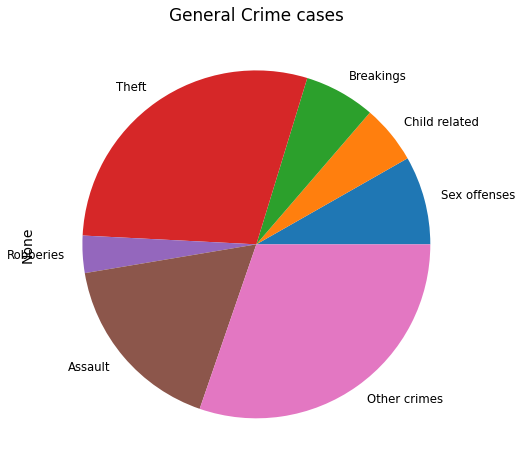

In [243]:
sex_off = sex_offenses.loc['Sub Total(Sex related)', 'Totals Cases']
child_rel = child_offenses_df.loc['Sub Total(Child related)', 'Totals Cases']
breakings = breaking_df.loc['Sub Total(Breakings)', 'Totals Cases']
theft = thefts_df.loc['Sub Total(Thefts)', 'Totals Cases']
robberies = robberies_df.loc['Sub Total(Robberies)', 'Totals Cases']
assault = assault_df.loc['Sub Total(Assault)', 'Totals Cases']
other_crimes = other_crimes_df.loc['Sub Total(Other Crimes-gen)', 'Totals Cases']

plot_data = pd.Series([sex_off,child_rel,breakings,theft,robberies,assault,other_crimes], index=['Sex offenses','Child related','Breakings','Theft','Robberies','Assault','Other crimes'])
plot_data.plot(kind='pie', fontsize='small', figsize=(20,8)).set_title("General Crime cases")

## Terrorism

In [145]:
crimes = ['Sex related','Child related','Breakings','Thefts','Robberies','Assault','Other crimes']
general_total = sex_offenses.loc['Sub Total(Sex related)', 'Totals Cases'] + child_offenses_df.loc['Sub Total(Child related)', 'Totals Cases'] + breaking_df.loc['Sub Total(Breakings)', 'Totals Cases'] + assault_df.loc['Sub Total(Assault)', 'Totals Cases'] + thefts_df.loc['Sub Total(Thefts)', 'Totals Cases'] + robberies_df.loc['Sub Total(Robberies)', 'Totals Cases'] + other_crimes_df.loc['Sub Total(Other Crimes-gen)', 'Totals Cases']
print(general_total)

212764


In [146]:
terrorism_df = df.iloc[96:99]
terrorism_df.reset_index(inplace=True)
terrorism_df.set_index('Case/ Crime incidences', inplace=True)
terrorism_df.replace("-",0, inplace=True)
terrorism_df.fillna(0, inplace=True)
for item in coln:
    terrorism_df = terrorism_df.astype({item: 'int64'})
terrorism_df.loc["Sub Total(Terrorism)"] = 0
terrorism_df.loc["Sub Total(Terrorism)"] = terrorism_df.sum()
terrorism_df

C:\Users\5CHAD3\anaconda3\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
C:\Users\5CHAD3\anaconda3\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


1,Totals Cases,Cases under Inquiry,Not Detected/NPW,Cases taken to court,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,Cases pending in Court,Male Adult,Male Juven.,Female Adult,Female Juven.,Male Adult,Male Juven.,Female Adult,Female Juven.,Acquitted,Discharged,Awaiting Trial,Male Adult,Male Juven.,Female Adult,Female Juven.,Death,Fined,Probation Bound Over,CAUTION,COMM. WORK,Fines Awarded (UgShs.),Male Adult,Male Juven.,Female Adult,Female Juven.,Lost,Recovered
Case/ Crime incidences,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Terrorism,16,13,0,3,8,0,0,0,3,4,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0
"Death By CBRN(Chemical,Nuclear Wpns)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0
Sub Total(Terrorism),16,13,0,3,8,0,0,0,3,4,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,24,0,0,0,0,0


## Political media offenses

In [147]:
political_media_offences_df = df.iloc[100:105]
political_media_offences_df.reset_index(inplace=True)
political_media_offences_df.set_index('Case/ Crime incidences', inplace=True)
political_media_offences_df.replace("-",0, inplace=True)
political_media_offences_df.replace(',','', regex=True, inplace=True)
for item in coln:
    political_media_offences_df = political_media_offences_df.astype({item: 'int64'})
political_media_offences_df.loc["Sub Total(Political/Media)"] = 0
political_media_offences_df.loc["Sub Total(Political/Media)"] = political_media_offences_df.sum()
political_media_offences_df

C:\Users\5CHAD3\anaconda3\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


1,Totals Cases,Cases under Inquiry,Not Detected/NPW,Cases taken to court,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,Cases pending in Court,Male Adult,Male Juven.,Female Adult,Female Juven.,Male Adult,Male Juven.,Female Adult,Female Juven.,Acquitted,Discharged,Awaiting Trial,Male Adult,Male Juven.,Female Adult,Female Juven.,Death,Fined,Probation Bound Over,CAUTION,COMM. WORK,Fines Awarded (UgShs.),Male Adult,Male Juven.,Female Adult,Female Juven.,Lost,Recovered
Case/ Crime incidences,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Incitement to Violence,181,81,66,34,67,4,1,7,22,126,1,0,0,18,0,0,0,1,6,102,0,0,0,0,0,0,0,0,18,0,171,0,11,0,0,0
Promoting Sectariasm,4,3,0,1,2,0,0,0,1,3,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0
Election Offences,249,97,110,42,101,5,2,11,24,76,1,4,0,8,1,0,0,4,15,53,0,0,0,0,0,2,0,3,4,1200000,215,1,25,0,0,0
Treason,8,5,0,3,4,0,0,0,3,45,0,4,0,0,0,0,0,0,0,49,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0
Sub Total(Political/Media),442,186,176,80,174,9,3,18,50,250,2,8,0,26,1,0,0,5,21,207,0,0,0,0,0,2,0,3,22,1200000,396,1,36,0,0,0


## Corruption

In [148]:
corruption_df = df.iloc[106:108]
corruption_df.reset_index(inplace=True)
corruption_df.set_index('Case/ Crime incidences', inplace=True)
corruption_df.replace("-",0, inplace=True)
corruption_df.replace(',','', regex=True, inplace=True)
for item in coln:
    corruption_df = corruption_df.astype({item: 'int64'})
corruption_df.loc["Sub Total (Corruption)"] = 0
corruption_df.loc["Sub Total (Corruption)"] = corruption_df.sum()
corruption_df

C:\Users\5CHAD3\anaconda3\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


1,Totals Cases,Cases under Inquiry,Not Detected/NPW,Cases taken to court,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,Cases pending in Court,Male Adult,Male Juven.,Female Adult,Female Juven.,Male Adult,Male Juven.,Female Adult,Female Juven.,Acquitted,Discharged,Awaiting Trial,Male Adult,Male Juven.,Female Adult,Female Juven.,Death,Fined,Probation Bound Over,CAUTION,COMM. WORK,Fines Awarded (UgShs.),Male Adult,Male Juven.,Female Adult,Female Juven.,Lost,Recovered
Case/ Crime incidences,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Prevention of Corruption Act,32,25,5,2,12,0,0,0,2,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,29,5,1,0,500000,500000
Sub Total (Corruption),32,25,5,2,12,0,0,0,2,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,29,5,1,0,500000,500000


## Narcotics

In [149]:
narcotics_drugs_df = df.iloc[109:114]
narcotics_drugs_df.reset_index(inplace=True)
narcotics_drugs_df.set_index('Case/ Crime incidences', inplace=True)
narcotics_drugs_df.replace("-",0, inplace=True)
narcotics_drugs_df.replace(',','', regex=True, inplace=True)
for item in coln:
    narcotics_drugs_df = narcotics_drugs_df.astype({item: 'int64'})
narcotics_drugs_df.loc["Sub Total(Narcotics)"] = 0
narcotics_drugs_df.loc["Sub Total(Narcotics)"] = narcotics_drugs_df.sum()
narcotics_drugs_df

C:\Users\5CHAD3\anaconda3\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


1,Totals Cases,Cases under Inquiry,Not Detected/NPW,Cases taken to court,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,Cases pending in Court,Male Adult,Male Juven.,Female Adult,Female Juven.,Male Adult,Male Juven.,Female Adult,Female Juven.,Acquitted,Discharged,Awaiting Trial,Male Adult,Male Juven.,Female Adult,Female Juven.,Death,Fined,Probation Bound Over,CAUTION,COMM. WORK,Fines Awarded (UgShs.),Male Adult,Male Juven.,Female Adult,Female Juven.,Lost,Recovered
Case/ Crime incidences,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Heroin,9,0,0,9,99,0,0,0,9,0,5,0,5,0,5,0,0,0,0,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Cocaine,7,1,3,3,4,1,0,0,2,2,0,1,0,1,0,0,0,0,0,2,-7,0,1,0,0,7,0,0,0,120500000,0,0,0,0,0,0
Herbal Cannabis,679,104,88,487,531,188,2,87,210,655,14,28,0,260,10,10,0,6,106,305,206,0,3,0,0,5,0,18,48,250000,508,1,36,0,0,0
Other Narcotics(general),2195,469,286,1440,1549,597,15,225,603,2693,63,85,9,993,12,23,0,17,443,1362,615,26,9,0,0,26,0,76,276,3980001,1790,19,101,0,850000,0
Sub Total(Narcotics),2890,574,377,1939,2183,786,17,312,824,3350,82,114,14,1254,27,33,0,23,549,1674,819,26,13,0,0,38,0,94,324,124730001,2298,20,137,0,850000,0


## Other laws

In [150]:
other_laws_df = df.iloc[115:124]
other_laws_df.reset_index(inplace=True)
other_laws_df.set_index('Case/ Crime incidences', inplace=True)
other_laws_df.replace("-",0, inplace=True)
other_laws_df.replace(',','', regex=True, inplace=True)
for item in coln:
    other_laws_df = other_laws_df.astype({item: 'int64'})
other_laws_df.loc["Sub Total(Other Laws)"] = 0
other_laws_df.loc["Sub Total(Other Laws)"] = other_laws_df.sum()
other_laws_df

C:\Users\5CHAD3\anaconda3\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


1,Totals Cases,Cases under Inquiry,Not Detected/NPW,Cases taken to court,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,Cases pending in Court,Male Adult,Male Juven.,Female Adult,Female Juven.,Male Adult,Male Juven.,Female Adult,Female Juven.,Acquitted,Discharged,Awaiting Trial,Male Adult,Male Juven.,Female Adult,Female Juven.,Death,Fined,Probation Bound Over,CAUTION,COMM. WORK,Fines Awarded (UgShs.),Male Adult,Male Juven.,Female Adult,Female Juven.,Lost,Recovered
Case/ Crime incidences,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Immigration Act,472,45,84,343,362,242,2,13,86,1139,24,267,134,857,43,235,14,5,18,392,608,0,7,0,0,438,0,93,3,230000000,363,0,8,0,0,0
NEMA,306,113,78,115,125,59,2,11,43,286,1,27,3,107,3,12,5,3,24,163,27,0,0,0,0,67,0,15,17,20700000,258,0,32,0,6600000,0
Fish and Crocodiles Act,642,91,155,396,428,231,5,55,105,855,4,27,0,499,0,12,0,10,136,229,269,1,4,0,0,77,0,127,33,10220000,633,0,3,0,0,0
Firearms Act,109,38,23,48,54,17,0,3,28,61,1,2,1,20,0,0,0,0,4,41,17,1,0,0,0,1,0,1,0,16000000,95,0,2,0,0,0
Enguli Act,4,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0
UWA Statute,648,112,89,447,485,269,8,26,144,609,7,17,0,377,0,11,0,10,42,193,249,3,4,0,0,107,0,15,10,172222000,608,0,8,0,26000000,26000000
Local Government Act,4,2,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0
All other Acts,821,345,189,287,430,173,7,19,93,641,12,76,0,323,8,44,0,1,56,297,121,2,3,0,0,120,21,41,60,69060000,710,10,62,9,241790000,440000
Sub Total(Other Laws),3006,749,620,1637,1885,991,24,127,500,3592,49,416,138,2183,54,314,19,29,280,1316,1291,7,18,0,0,810,21,292,123,518202000,2676,10,115,9,274390000,26440000


In [151]:
homicides = homicides_df.loc['Sub Total(Homicides)', 'Totals Cases']
economic = economic_df.loc['Sub Total(Economic crimes)', 'Totals Cases']
terrorism = terrorism_df.loc['Sub Total(Terrorism)', 'Totals Cases']
political_media_offences = political_media_offences_df.loc['Sub Total(Political/Media)', 'Totals Cases']
corruption = corruption_df.loc['Sub Total (Corruption)', 'Totals Cases']
narcotics = narcotics_drugs_df.loc['Sub Total(Narcotics)', 'Totals Cases']
other_laws = other_laws_df.loc['Sub Total(Other Laws)', 'Totals Cases']

In [152]:
data = pd.Series([homicides, economic, terrorism, political_media_offences, corruption, narcotics, other_laws, general_total], index=['homicides', 'economic crimes', 'terrorism', 'political_media_offences', 'corruption', 'narcotics', 'other_laws','general crimes'])
data

homicides                     4497
economic crimes              15099
terrorism                       16
political_media_offences       442
corruption                      32
narcotics                     2890
other_laws                    3006
general crimes              212764
dtype: int64

Text(0.5, 1.0, 'Total Crime cases')

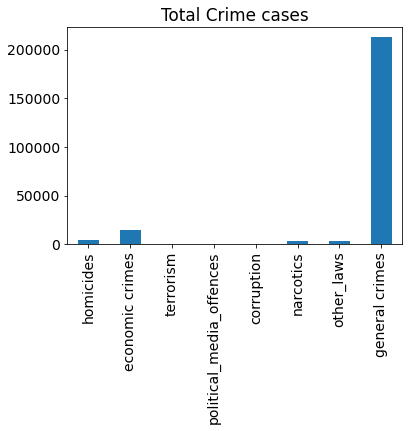

In [153]:
data.plot(kind='bar').set_title("Total Crime cases")

## CASES CHARGED BASED ON GENDER

In [154]:
male_adult_homicides = homicides_df.iloc[-1,9]
male_juven_homicides = homicides_df.iloc[-1,10]
female_adult_homicides = homicides_df.iloc[-1,11]
female_juven_homicides = homicides_df.iloc[-1,12]

hd = pd.Series([male_adult_homicides, male_juven_homicides, female_adult_homicides, female_juven_homicides],
               index=['male adult', 'male juven', 'female adult', 'female juven'])

In [242]:
male_adult_economic = economic_df.iloc[-1,9]
male_juven_economic  = economic_df.iloc[-1,10]
female_adult_economic  = economic_df.iloc[-1,11]
female_juven_economic  = economic_df.iloc[-1,12]

ed = pd.Series([male_adult_economic, male_juven_economic, female_adult_economic, female_juven_economic],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [241]:
male_adult_sex_offences = sex_offenses.iloc[-1,9]
male_juven_sex_offences = sex_offenses.iloc[-1,10]
female_adult_sex_offences  = sex_offenses.iloc[-1,11]
female_juven_sex_offences  = sex_offenses.iloc[-1,12]

so = pd.Series([male_adult_sex_offences, male_juven_sex_offences, female_adult_sex_offences, female_juven_sex_offences],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [158]:
male_adult_child_offences = child_offenses_df.iloc[-1,9]
male_juven_child_offences = child_offenses_df.iloc[-1,10]
female_adult_child_offences  = child_offenses_df.iloc[-1,11]
female_juven_child_offences  = child_offenses_df.iloc[-1,12]

co = pd.Series([male_adult_child_offences , male_juven_child_offences , female_adult_child_offences , female_juven_child_offences],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [159]:
male_adult_thefts = thefts_df.iloc[-1,9]
male_juven_thefts = thefts_df.iloc[-1,10]
female_adult_thefts = thefts_df.iloc[-1,11]
female_juven_thefts = thefts_df.iloc[-1,12]

td = pd.Series([male_adult_thefts , male_juven_thefts , female_adult_thefts , female_juven_thefts],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [160]:
male_adult_robberies = robberies_df.iloc[-1,9]
male_juven_robberies = robberies_df.iloc[-1,10]
female_adult_robberies = robberies_df.iloc[-1,11]
female_juven_robberies = robberies_df.iloc[-1,12]

rd = pd.Series([male_adult_robberies , male_juven_robberies , female_adult_robberies , female_juven_robberies],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [161]:
male_adult_breaking = breaking_df.iloc[-1,9]
male_juven_breaking = breaking_df.iloc[-1,10]
female_adult_breaking = breaking_df.iloc[-1,11]
female_juven_breaking = breaking_df.iloc[-1,12]

bd = pd.Series([male_adult_breaking , male_juven_breaking , female_adult_breaking , female_juven_breaking],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [162]:
male_adult_assault = assault_df.iloc[-1,9]
male_juven_assault = assault_df.iloc[-1,10]
female_adult_assault = assault_df.iloc[-1,11]
female_juven_assault = assault_df.iloc[-1,12]

ad = pd.Series([male_adult_assault , male_juven_assault, female_adult_assault , female_juven_assault],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [163]:
male_adult_other_crimes = other_crimes_df.iloc[-1,9]
male_juven_other_crimes = other_crimes_df.iloc[-1,10]
female_adult_other_crimes = other_crimes_df.iloc[-1,11]
female_juven_other_crimes = other_crimes_df.iloc[-1,12]

oc = pd.Series([male_adult_other_crimes, male_juven_other_crimes, female_adult_other_crimes, female_juven_other_crimes],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [164]:
male_adult_terrorism = terrorism_df.iloc[-1,9]
male_juven_terrorism  = terrorism_df.iloc[-1,10]
female_adult_terrorism  = terrorism_df.iloc[-1,11]
female_juven_terrorism  = terrorism_df.iloc[-1,12]

ted = pd.Series([male_adult_terrorism, male_juven_terrorism, female_adult_terrorism, female_juven_terrorism],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [165]:
male_adult_political_media_offences = political_media_offences_df.iloc[-1,9]
male_juven_political_media_offences = political_media_offences_df.iloc[-1,10]
female_adult_political_media_offences  = political_media_offences_df.iloc[-1,11]
female_juven_political_media_offences = political_media_offences_df.iloc[-1,12]

pmo = pd.Series([male_adult_political_media_offences, male_juven_political_media_offences, female_adult_political_media_offences, female_juven_political_media_offences],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [166]:
male_adult_corruption = corruption_df.iloc[-1,9]
male_juven_corruption  = corruption_df.iloc[-1,10]
female_adult_corruption = corruption_df.iloc[-1,11]
female_juven_corruption = corruption_df.iloc[-1,12]

cd = pd.Series([male_adult_corruption, male_juven_corruption, female_adult_corruption, female_juven_corruption],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [167]:
male_adult_narcotics_drugs = narcotics_drugs_df.iloc[-1,9]
male_juven_narcotics_drugs  = narcotics_drugs_df.iloc[-1,10]
female_adult_narcotics_drugs = narcotics_drugs_df.iloc[-1,11]
female_juven_narcotics_drugs = narcotics_drugs_df.iloc[-1,12]

nd = pd.Series([male_adult_narcotics_drugs, male_juven_narcotics_drugs, female_adult_narcotics_drugs, female_juven_narcotics_drugs],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [168]:
male_adult_other_laws = other_laws_df.iloc[-1,9]
male_juven_other_laws = other_laws_df.iloc[-1,10]
female_adult_other_laws  = other_laws_df.iloc[-1,11]
female_juven_other_laws  = other_laws_df.iloc[-1,12]

ol = pd.Series([male_adult_other_laws, male_juven_other_laws, female_adult_other_laws, female_juven_other_laws],
               index=['male adult', 'male juven', 'female adult', 'female juven'])

In [169]:
df1 = pd.DataFrame(columns=['male adult', 'male juven', 'female adult', 'female juven'], 
                   index=['other laws', 'homicides', 'economics', 'sex offences', 'child offences', 'thefts', 'robberies', 'breaking', 'assault', 'other crimes', 'terrorism', 'political media', 'corruption', 'narcotics'])
df1.iloc[0] = ol
df1.iloc[1] = hd
df1.iloc[2] = ed
df1.iloc[3] = so
df1.iloc[4] = co
df1.iloc[5] = td
df1.iloc[6] = rd
df1.iloc[7] = bd
df1.iloc[8] = ad
df1.iloc[9] = oc
df1.iloc[10] = ted
df1.iloc[11] = pmo
df1.iloc[12] = cd
df1.iloc[13] = nd
df1

,male adult,male juven,female adult,female juven
other laws,3592,49,416,138
homicides,1566,35,221,5
economics,3112,19,307,9
sex offences,5999,398,35,147
child offences,593,2,231,13
thefts,24999,825,1462,134
robberies,2621,107,49,5
breaking,7110,320,196,23
assault,7462,177,1300,26
other crimes,18423,339,1649,82


### A graph showing the cases accused charged based on gender

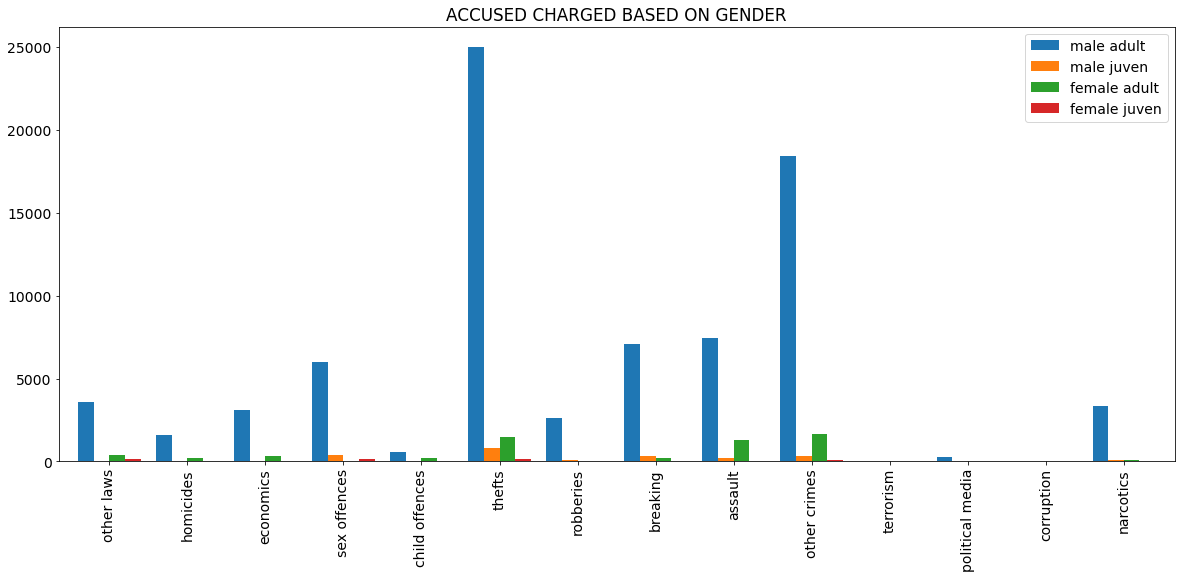

In [240]:
plt.rc('font', size=14)  
df1.plot.bar(width=0.8,figsize=(20,8),title = 'ACCUSED CHARGED BASED ON GENDER')

## ACCUSED CONVICTED BASED ON GENDER

In [171]:
male_adult_homicides = homicides_df.iloc[-1,13]
male_juven_homicides = homicides_df.iloc[-1,14]
female_adult_homicides = homicides_df.iloc[-1,15]
female_juven_homicides = homicides_df.iloc[-1,16]

hd = pd.Series([male_adult_homicides, male_juven_homicides, female_adult_homicides, female_juven_homicides],
               index=['male adult', 'male juven', 'female adult', 'female juven'])

In [172]:
male_adult_economic = economic_df.iloc[-1,13]
male_juven_economic  = economic_df.iloc[-1,14]
female_adult_economic  = economic_df.iloc[-1,15]
female_juven_economic  = economic_df.iloc[-1,16]

ed = pd.Series([male_adult_economic, male_juven_economic, female_adult_economic, female_juven_economic],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [173]:
male_adult_sex_offences = sex_offenses.iloc[-1,13]
male_juven_sex_offences = sex_offenses.iloc[-1,14]
female_adult_sex_offences  = sex_offenses.iloc[-1,15]
female_juven_sex_offences  = sex_offenses.iloc[-1,16]

so = pd.Series([male_adult_sex_offences, male_juven_sex_offences, female_adult_sex_offences, female_juven_sex_offences],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [174]:
male_adult_child_offences = child_offenses_df.iloc[-1,13]
male_juven_child_offences = child_offenses_df.iloc[-1,14]
female_adult_child_offences  = child_offenses_df.iloc[-1,15]
female_juven_child_offences  = child_offenses_df.iloc[-1,16]

co = pd.Series([male_adult_child_offences , male_juven_child_offences , female_adult_child_offences , female_juven_child_offences],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [175]:
male_adult_thefts = thefts_df.iloc[-1,13]
male_juven_thefts = thefts_df.iloc[-1,14]
female_adult_thefts = thefts_df.iloc[-1,15]
female_juven_thefts = thefts_df.iloc[-1,16]

td = pd.Series([male_adult_thefts , male_juven_thefts , female_adult_thefts , female_juven_thefts],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [176]:
male_adult_robberies = robberies_df.iloc[-1,13]
male_juven_robberies = robberies_df.iloc[-1,14]
female_adult_robberies = robberies_df.iloc[-1,15]
female_juven_robberies = robberies_df.iloc[-1,16]

rd = pd.Series([male_adult_robberies , male_juven_robberies , female_adult_robberies , female_juven_robberies],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [177]:
male_adult_breaking = breaking_df.iloc[-1,13]
male_juven_breaking = breaking_df.iloc[-1,14]
female_adult_breaking = breaking_df.iloc[-1,15]
female_juven_breaking = breaking_df.iloc[-1,16]

bd = pd.Series([male_adult_breaking , male_juven_breaking , female_adult_breaking , female_juven_breaking],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [178]:
male_adult_assault = assault_df.iloc[-1,13]
male_juven_assault = assault_df.iloc[-1,14]
female_adult_assault = assault_df.iloc[-1,15]
female_juven_assault = assault_df.iloc[-1,16]

ad = pd.Series([male_adult_assault , male_juven_assault, female_adult_assault , female_juven_assault],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [179]:
male_adult_other_crimes = other_crimes_df.iloc[-1,13]
male_juven_other_crimes = other_crimes_df.iloc[-1,14]
female_adult_other_crimes = other_crimes_df.iloc[-1,15]
female_juven_other_crimes = other_crimes_df.iloc[-1,16]

oc = pd.Series([male_adult_other_crimes, male_juven_other_crimes, female_adult_other_crimes, female_juven_other_crimes],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [180]:
male_adult_terrorism = terrorism_df.iloc[-1,13]
male_juven_terrorism  = terrorism_df.iloc[-1,14]
female_adult_terrorism  = terrorism_df.iloc[-1,15]
female_juven_terrorism  = terrorism_df.iloc[-1,16]

ted = pd.Series([male_adult_terrorism, male_juven_terrorism, female_adult_terrorism, female_juven_terrorism],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [181]:
male_adult_political_media_offences = political_media_offences_df.iloc[-1,13]
male_juven_political_media_offences = political_media_offences_df.iloc[-1,14]
female_adult_political_media_offences  = political_media_offences_df.iloc[-1,15]
female_juven_political_media_offences = political_media_offences_df.iloc[-1,16]

pmo = pd.Series([male_adult_political_media_offences, male_juven_political_media_offences, female_adult_political_media_offences, female_juven_political_media_offences],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [182]:
male_adult_corruption = corruption_df.iloc[-1,13]
male_juven_corruption  = corruption_df.iloc[-1,14]
female_adult_corruption = corruption_df.iloc[-1,15]
female_juven_corruption = corruption_df.iloc[-1,16]

cd = pd.Series([male_adult_corruption, male_juven_corruption, female_adult_corruption, female_juven_corruption],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [183]:
male_adult_narcotics_drugs = narcotics_drugs_df.iloc[-1,13]
male_juven_narcotics_drugs  = narcotics_drugs_df.iloc[-1,14]
female_adult_narcotics_drugs = narcotics_drugs_df.iloc[-1,15]
female_juven_narcotics_drugs = narcotics_drugs_df.iloc[-1,16]

nd = pd.Series([male_adult_narcotics_drugs, male_juven_narcotics_drugs, female_adult_narcotics_drugs, female_juven_narcotics_drugs],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [184]:
male_adult_other_laws = other_laws_df.iloc[-1,13]
male_juven_other_laws = other_laws_df.iloc[-1,14]
female_adult_other_laws  = other_laws_df.iloc[-1,15]
female_juven_other_laws  = other_laws_df.iloc[-1,16]

ol = pd.Series([male_adult_other_laws, male_juven_other_laws, female_adult_other_laws, female_juven_other_laws],
               index=['male adult', 'male juven', 'female adult', 'female juven'])

In [185]:
df2 = pd.DataFrame(columns=['male adult', 'male juven', 'female adult', 'female juven'], 
                   index=['other laws', 'homicides', 'economics', 'sex offences', 'child offences', 'thefts', 'robberies', 'breaking', 'assault', 'other crimes', 'terrorism', 'political media', 'corruption', 'narcotics'])
df2.iloc[0] = ol
df2.iloc[1] = hd
df2.iloc[2] = ed
df2.iloc[3] = so
df2.iloc[4] = co
df2.iloc[5] = td
df2.iloc[6] = rd
df2.iloc[7] = bd
df2.iloc[8] = ad
df2.iloc[9] = oc
df2.iloc[10] = ted
df2.iloc[11] = pmo
df2.iloc[12] = cd
df2.iloc[13] = nd
df2

,male adult,male juven,female adult,female juven
other laws,2183,54,314,19
homicides,41,3,6,0
economics,905,7,87,8
sex offences,784,135,10,105
child offences,168,0,75,4
thefts,8566,317,442,58
robberies,392,20,12,4
breaking,1850,84,51,1
assault,2297,51,420,9
other crimes,6250,113,494,15


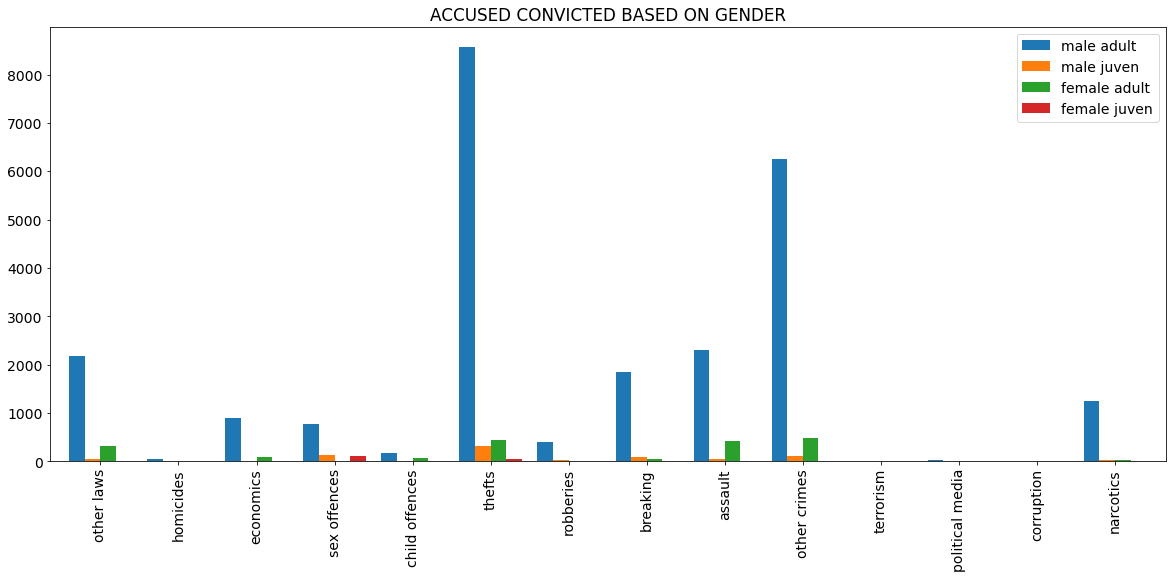

In [239]:
df2.plot.bar(width=0.8,figsize=(20,8),title = 'ACCUSED CONVICTED BASED ON GENDER')

## IMPRISONMENTS BASED ON GENDER FOR EACH CRIME

In [187]:
male_adult_homicides = homicides_df.iloc[-1,20]
male_juven_homicides = homicides_df.iloc[-1,21]
female_adult_homicides = homicides_df.iloc[-1,22]
female_juven_homicides = homicides_df.iloc[-1,23]

hd = pd.Series([male_adult_homicides, male_juven_homicides, female_adult_homicides, female_juven_homicides],
               index=['male adult', 'male juven', 'female adult', 'female juven'])

In [188]:
male_adult_economic = economic_df.iloc[-1,20]
male_juven_economic  = economic_df.iloc[-1,21]
female_adult_economic  = economic_df.iloc[-1,22]
female_juven_economic  = economic_df.iloc[-1,23]

ed = pd.Series([male_adult_economic, male_juven_economic, female_adult_economic, female_juven_economic],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [189]:
male_adult_sex_offences = sex_offenses.iloc[-1,20]
male_juven_sex_offences = sex_offenses.iloc[-1,21]
female_adult_sex_offences  = sex_offenses.iloc[-1,22]
female_juven_sex_offences  = sex_offenses.iloc[-1,23]

so = pd.Series([male_adult_sex_offences, male_juven_sex_offences, female_adult_sex_offences, female_juven_sex_offences],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [190]:
male_adult_child_offences = child_offenses_df.iloc[-1,20]
male_juven_child_offences = child_offenses_df.iloc[-1,21]
female_adult_child_offences  = child_offenses_df.iloc[-1,22]
female_juven_child_offences  = child_offenses_df.iloc[-1,23]

co = pd.Series([male_adult_child_offences , male_juven_child_offences , female_adult_child_offences , female_juven_child_offences],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [191]:
male_adult_thefts = thefts_df.iloc[-1,20]
male_juven_thefts = thefts_df.iloc[-1,21]
female_adult_thefts = thefts_df.iloc[-1,22]
female_juven_thefts = thefts_df.iloc[-1,23]

td = pd.Series([male_adult_thefts , male_juven_thefts , female_adult_thefts , female_juven_thefts],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [192]:
male_adult_robberies = robberies_df.iloc[-1,20]
male_juven_robberies = robberies_df.iloc[-1,21]
female_adult_robberies = robberies_df.iloc[-1,22]
female_juven_robberies = robberies_df.iloc[-1,23]

rd = pd.Series([male_adult_robberies , male_juven_robberies , female_adult_robberies , female_juven_robberies],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [193]:
male_adult_breaking = breaking_df.iloc[-1,20]
male_juven_breaking = breaking_df.iloc[-1,21]
female_adult_breaking = breaking_df.iloc[-1,22]
female_juven_breaking = breaking_df.iloc[-1,23]

bd = pd.Series([male_adult_breaking , male_juven_breaking , female_adult_breaking , female_juven_breaking],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [194]:
male_adult_assault = assault_df.iloc[-1,20]
male_juven_assault = assault_df.iloc[-1,21]
female_adult_assault = assault_df.iloc[-1,22]
female_juven_assault = assault_df.iloc[-1,23]

ad = pd.Series([male_adult_assault , male_juven_assault, female_adult_assault , female_juven_assault],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [195]:
male_adult_other_crimes = other_crimes_df.iloc[-1,20]
male_juven_other_crimes = other_crimes_df.iloc[-1,21]
female_adult_other_crimes = other_crimes_df.iloc[-1,22]
female_juven_other_crimes = other_crimes_df.iloc[-1,23]

oc = pd.Series([male_adult_other_crimes, male_juven_other_crimes, female_adult_other_crimes, female_juven_other_crimes],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [196]:
male_adult_terrorism = terrorism_df.iloc[-1,20]
male_juven_terrorism  = terrorism_df.iloc[-1,21]
female_adult_terrorism  = terrorism_df.iloc[-1,22]
female_juven_terrorism  = terrorism_df.iloc[-1,23]

ted = pd.Series([male_adult_terrorism, male_juven_terrorism, female_adult_terrorism, female_juven_terrorism],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [197]:
male_adult_political_media_offences = political_media_offences_df.iloc[-1,20]
male_juven_political_media_offences = political_media_offences_df.iloc[-1,21]
female_adult_political_media_offences  = political_media_offences_df.iloc[-1,22]
female_juven_political_media_offences = political_media_offences_df.iloc[-1,23]

pmo = pd.Series([male_adult_political_media_offences, male_juven_political_media_offences, female_adult_political_media_offences, female_juven_political_media_offences],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [198]:
male_adult_corruption = corruption_df.iloc[-1,20]
male_juven_corruption  = corruption_df.iloc[-1,21]
female_adult_corruption = corruption_df.iloc[-1,22]
female_juven_corruption = corruption_df.iloc[-1,23]

cd = pd.Series([male_adult_corruption, male_juven_corruption, female_adult_corruption, female_juven_corruption],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [199]:
male_adult_narcotics_drugs = narcotics_drugs_df.iloc[-1,20]
male_juven_narcotics_drugs  = narcotics_drugs_df.iloc[-1,21]
female_adult_narcotics_drugs = narcotics_drugs_df.iloc[-1,22]
female_juven_narcotics_drugs = narcotics_drugs_df.iloc[-1,23]

nd = pd.Series([male_adult_narcotics_drugs, male_juven_narcotics_drugs, female_adult_narcotics_drugs, female_juven_narcotics_drugs],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [200]:
male_adult_other_laws = other_laws_df.iloc[-1,20]
male_juven_other_laws = other_laws_df.iloc[-1,21]
female_adult_other_laws  = other_laws_df.iloc[-1,22]
female_juven_other_laws  = other_laws_df.iloc[-1,23]

ol = pd.Series([male_adult_other_laws, male_juven_other_laws, female_adult_other_laws, female_juven_other_laws],
               index=['male adult', 'male juven', 'female adult', 'female juven'])

In [201]:
df3 = pd.DataFrame(columns=['male adult', 'male juven', 'female adult', 'female juven'], 
                   index=['other laws', 'homicides', 'economics', 'sex offences', 'child offences', 'thefts', 'robberies', 'breaking', 'assault', 'other crimes', 'terrorism', 'political media', 'corruption', 'narcotics'])
df3.iloc[0] = ol
df3.iloc[1] = hd
df3.iloc[2] = ed
df3.iloc[3] = so
df3.iloc[4] = co
df3.iloc[5] = td
df3.iloc[6] = rd
df3.iloc[7] = bd
df3.iloc[8] = ad
df3.iloc[9] = oc
df3.iloc[10] = ted
df3.iloc[11] = pmo
df3.iloc[12] = cd
df3.iloc[13] = nd
df3

,male adult,male juven,female adult,female juven
other laws,1291,7,18,0
homicides,36,2,10,0
economics,568,1,30,0
sex offences,634,12,8,3
child offences,91,0,49,2
thefts,6430,138,220,16
robberies,295,8,7,1
breaking,1524,23,31,0
assault,1402,8,206,3
other crimes,4049,49,231,6


## A graph showing the imprisonments based on gender

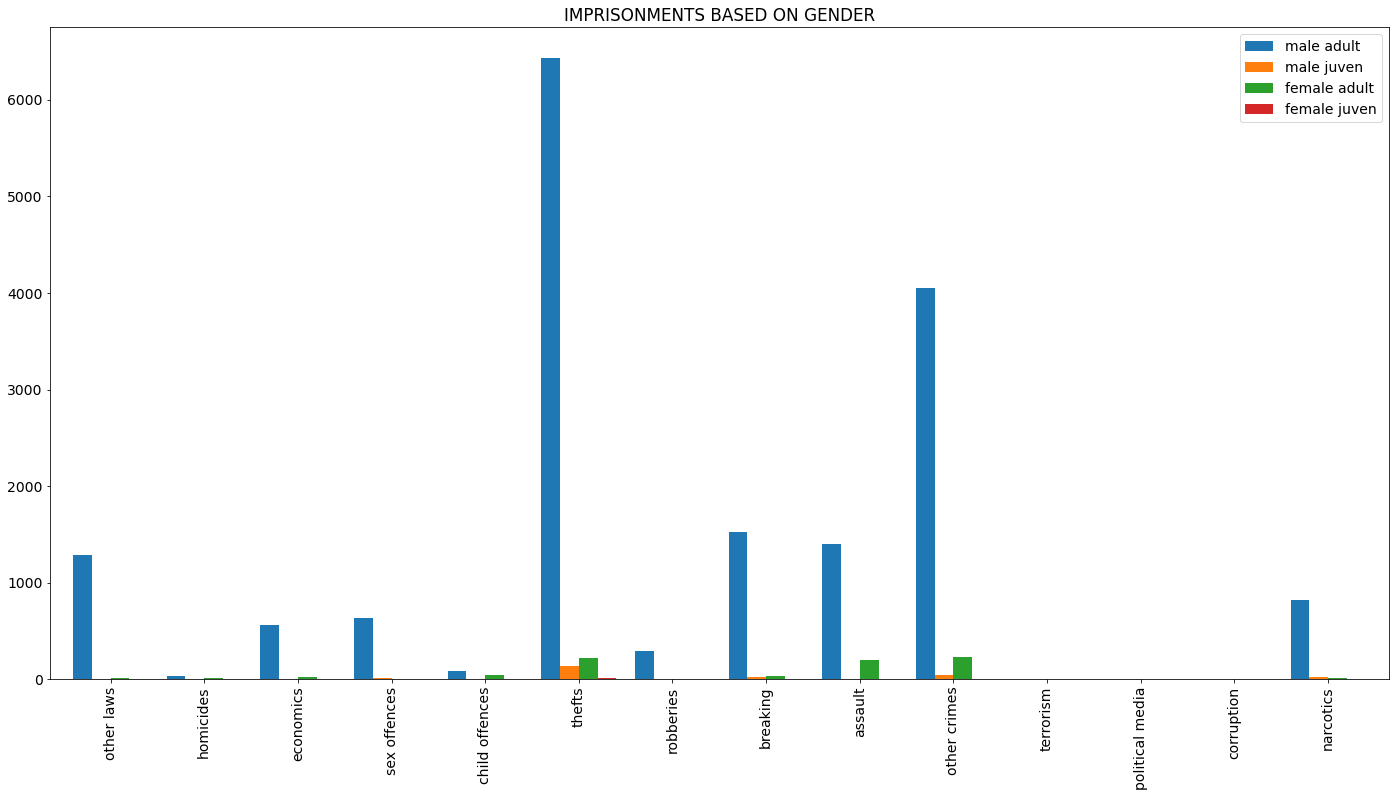

In [238]:
df3.plot.bar(width=0.8,figsize=(24,12),title = 'IMPRISONMENTS BASED ON GENDER')

## VICTIMS OF CRIMES BASED ON GENDER

In [203]:
male_adult_homicides = homicides_df.iloc[-1,30]
male_juven_homicides = homicides_df.iloc[-1,31]
female_adult_homicides = homicides_df.iloc[-1,32]
female_juven_homicides = homicides_df.iloc[-1,33]

hd = pd.Series([male_adult_homicides, male_juven_homicides, female_adult_homicides, female_juven_homicides],
               index=['male adult', 'male juven', 'female adult', 'female juven'])

In [204]:
male_adult_economic = economic_df.iloc[-1,30]
male_juven_economic  = economic_df.iloc[-1,31]
female_adult_economic  = economic_df.iloc[-1,32]
female_juven_economic  = economic_df.iloc[-1,33]

ed = pd.Series([male_adult_economic, male_juven_economic, female_adult_economic, female_juven_economic],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [205]:
male_adult_sex_offences = sex_offenses.iloc[-1,30]
male_juven_sex_offences = sex_offenses.iloc[-1,31]
female_adult_sex_offences  = sex_offenses.iloc[-1,32]
female_juven_sex_offences  = sex_offenses.iloc[-1,33]

so = pd.Series([male_adult_sex_offences, male_juven_sex_offences, female_adult_sex_offences, female_juven_sex_offences],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [206]:
male_adult_child_offences = child_offenses_df.iloc[-1,30]
male_juven_child_offences = child_offenses_df.iloc[-1,31]
female_adult_child_offences  = child_offenses_df.iloc[-1,32]
female_juven_child_offences  = child_offenses_df.iloc[-1,33]

co = pd.Series([male_adult_child_offences , male_juven_child_offences , female_adult_child_offences , female_juven_child_offences],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [207]:
male_adult_thefts = thefts_df.iloc[-1,30]
male_juven_thefts = thefts_df.iloc[-1,31]
female_adult_thefts = thefts_df.iloc[-1,32]
female_juven_thefts = thefts_df.iloc[-1,33]

td = pd.Series([male_adult_thefts , male_juven_thefts , female_adult_thefts , female_juven_thefts],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [208]:
male_adult_robberies = robberies_df.iloc[-1,30]
male_juven_robberies = robberies_df.iloc[-1,31]
female_adult_robberies = robberies_df.iloc[-1,32]
female_juven_robberies = robberies_df.iloc[-1,33]

rd = pd.Series([male_adult_robberies , male_juven_robberies , female_adult_robberies , female_juven_robberies],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [209]:
male_adult_breaking = breaking_df.iloc[-1,30]
male_juven_breaking = breaking_df.iloc[-1,31]
female_adult_breaking = breaking_df.iloc[-1,32]
female_juven_breaking = breaking_df.iloc[-1,33]

bd = pd.Series([male_adult_breaking , male_juven_breaking , female_adult_breaking , female_juven_breaking],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [210]:
male_adult_assault = assault_df.iloc[-1,30]
male_juven_assault = assault_df.iloc[-1,31]
female_adult_assault = assault_df.iloc[-1,32]
female_juven_assault = assault_df.iloc[-1,33]

ad = pd.Series([male_adult_assault , male_juven_assault, female_adult_assault , female_juven_assault],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [211]:
male_adult_other_crimes = other_crimes_df.iloc[-1,30]
male_juven_other_crimes = other_crimes_df.iloc[-1,31]
female_adult_other_crimes = other_crimes_df.iloc[-1,32]
female_juven_other_crimes = other_crimes_df.iloc[-1,33]

oc = pd.Series([male_adult_other_crimes, male_juven_other_crimes, female_adult_other_crimes, female_juven_other_crimes],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [212]:
male_adult_terrorism = terrorism_df.iloc[-1,30]
male_juven_terrorism  = terrorism_df.iloc[-1,31]
female_adult_terrorism  = terrorism_df.iloc[-1,32]
female_juven_terrorism  = terrorism_df.iloc[-1,33]

ted = pd.Series([male_adult_terrorism, male_juven_terrorism, female_adult_terrorism, female_juven_terrorism],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [213]:
male_adult_political_media_offences = political_media_offences_df.iloc[-1,30]
male_juven_political_media_offences = political_media_offences_df.iloc[-1,31]
female_adult_political_media_offences  = political_media_offences_df.iloc[-1,32]
female_juven_political_media_offences = political_media_offences_df.iloc[-1,33]

pmo = pd.Series([male_adult_political_media_offences, male_juven_political_media_offences, female_adult_political_media_offences, female_juven_political_media_offences],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [214]:
male_adult_corruption = corruption_df.iloc[-1,30]
male_juven_corruption  = corruption_df.iloc[-1,31]
female_adult_corruption = corruption_df.iloc[-1,32]
female_juven_corruption = corruption_df.iloc[-1,33]

cd = pd.Series([male_adult_corruption, male_juven_corruption, female_adult_corruption, female_juven_corruption],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [215]:
male_adult_narcotics_drugs = narcotics_drugs_df.iloc[-1,30]
male_juven_narcotics_drugs  = narcotics_drugs_df.iloc[-1,31]
female_adult_narcotics_drugs = narcotics_drugs_df.iloc[-1,32]
female_juven_narcotics_drugs = narcotics_drugs_df.iloc[-1,33]

nd = pd.Series([male_adult_narcotics_drugs, male_juven_narcotics_drugs, female_adult_narcotics_drugs, female_juven_narcotics_drugs],
              index=['male adult', 'male juven', 'female adult', 'female juven'])

In [216]:
male_adult_other_laws = other_laws_df.iloc[-1,30]
male_juven_other_laws = other_laws_df.iloc[-1,31]
female_adult_other_laws  = other_laws_df.iloc[-1,32]
female_juven_other_laws  = other_laws_df.iloc[-1,33]

ol = pd.Series([male_adult_other_laws, male_juven_other_laws, female_adult_other_laws, female_juven_other_laws],
               index=['male adult', 'male juven', 'female adult', 'female juven'])

In [217]:
df4 = pd.DataFrame(columns=['male adult', 'male juven', 'female adult', 'female juven'], 
                   index=['other laws', 'homicides', 'economics', 'sex offences', 'child offences', 'thefts', 'robberies', 'breaking', 'assault', 'other crimes', 'terrorism', 'political media', 'corruption', 'narcotics'])
df4.iloc[0] = ol
df4.iloc[1] = hd
df4.iloc[2] = ed
df4.iloc[3] = so
df4.iloc[4] = co
df4.iloc[5] = td
df4.iloc[6] = rd
df4.iloc[7] = bd
df4.iloc[8] = ad
df4.iloc[9] = oc
df4.iloc[10] = ted
df4.iloc[11] = pmo
df4.iloc[12] = cd
df4.iloc[13] = nd
df4

,male adult,male juven,female adult,female juven
other laws,2676,10,115,9
homicides,3546,265,674,144
economics,11775,15,3334,5
sex offences,87,277,1850,15469
child offences,0,7675,0,6922
thefts,46614,347,13845,181
robberies,5820,48,1482,4
breaking,10651,89,3315,64
assault,21724,908,12212,354
other crimes,38252,1112,23646,1032


## VICTIME OF ALL CRIMES BASED ON EACH GENDER

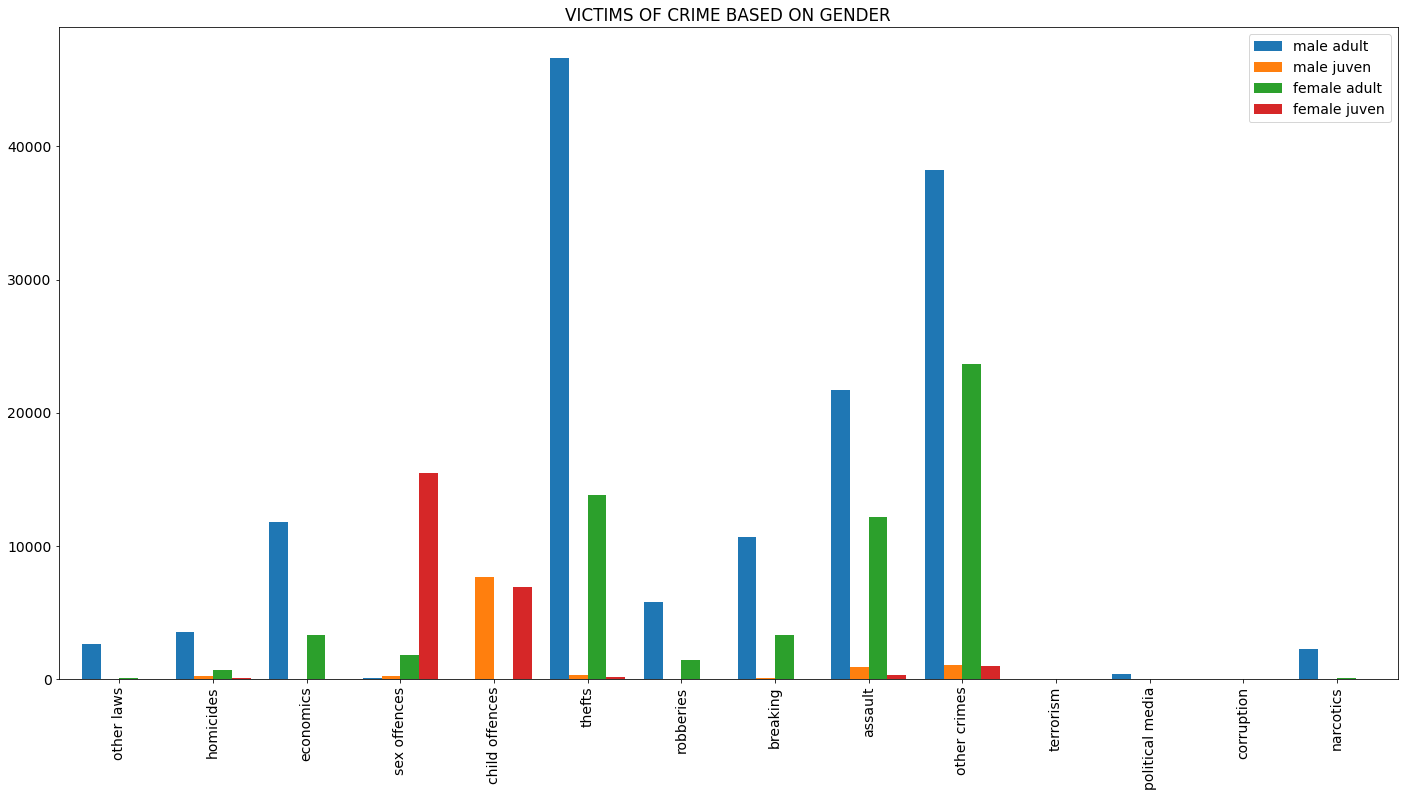

In [237]:
df4.plot.bar(width=0.8,figsize=(24,12),title='VICTIMS OF CRIME BASED ON GENDER')

## PERFORMANCE

In [219]:
submitted_homicides = homicides_df.iloc[-1,4]
convictions_homicides = homicides_df.iloc[-1,5]
acquittals_homicides = homicides_df.iloc[-1,6]
dismissed_homicides = homicides_df.iloc[-1,7]
pending_homicides = homicides_df.iloc[-1,8]

homicide_cases = pd.Series([submitted_homicides, convictions_homicides, acquittals_homicides, dismissed_homicides, pending_homicides],
               index=['submitted cases', 'convicted cases', 'acquitted cases', 'dismissed cases','pending'])

In [220]:
submitted_economic = economic_df.iloc[-1,4]
convictions_economic = economic_df.iloc[-1,5]
acquittals_economic = economic_df.iloc[-1,6]
dismissed_economic = economic_df.iloc[-1,7]
pending_economic = economic_df.iloc[-1,8]

economic_cases = pd.Series([submitted_economic, convictions_economic, acquittals_economic, dismissed_economic, pending_economic],
               index=['submitted cases', 'convicted cases', 'acquitted cases', 'dismissed cases','pending'])

In [221]:
economic_cases

submitted cases    5746
convicted cases     952
acquitted cases      61
dismissed cases     467
pending            1633
dtype: int64

In [222]:
submitted_robberies = robberies_df.iloc[-1,4]
convictions_robberies = robberies_df.iloc[-1,5]
acquittals_robberies = robberies_df.iloc[-1,6]
dismissed_robberies = robberies_df.iloc[-1,7]
pending_robberies = robberies_df.iloc[-1,8]

robbery_cases = pd.Series([submitted_robberies, convictions_robberies, acquittals_robberies, dismissed_robberies, pending_robberies],
               index=['submitted cases', 'convicted cases', 'acquitted cases', 'dismissed cases','pending'])

In [223]:
submitted_sex_offenses = sex_offenses.iloc[-1,4]
convictions_sex_offenses = sex_offenses.iloc[-1,5]
acquittals_sex_offenses = sex_offenses.iloc[-1,6]
dismissed_sex_offenses = sex_offenses.iloc[-1,7]
pending_sex_offenses = sex_offenses.iloc[-1,8]

sex_cases = pd.Series([submitted_sex_offenses, convictions_sex_offenses, acquittals_sex_offenses, dismissed_sex_offenses, pending_sex_offenses],
               index=['submitted cases', 'convicted cases', 'acquitted cases', 'dismissed cases','pending'])

In [224]:
submitted_child_offenses = child_offenses_df.iloc[-1,4]
convictions_child_offenses = child_offenses_df.iloc[-1,5]
acquittals_child_offenses = child_offenses_df.iloc[-1,6]
dismissed_child_offenses = child_offenses_df.iloc[-1,7]
pending_child_offenses = child_offenses_df.iloc[-1,8]

child_cases = pd.Series([submitted_child_offenses, convictions_child_offenses, acquittals_child_offenses, dismissed_child_offenses, pending_child_offenses],
               index=['submitted cases', 'convicted cases', 'acquitted cases', 'dismissed cases','pending'])

In [225]:
submitted_thefts = thefts_df.iloc[-1,4]
convictions_thefts =thefts_df.iloc[-1,5]
acquittals_thefts = thefts_df.iloc[-1,6]
dismissed_thefts = thefts_df.iloc[-1,7]
pending_thefts = thefts_df.iloc[-1,8]

theft_cases = pd.Series([submitted_thefts, convictions_thefts, acquittals_thefts, dismissed_thefts, pending_thefts],
               index=['submitted cases', 'convicted cases', 'acquitted cases', 'dismissed cases','pending'])

In [226]:
submitted_breaking = breaking_df.iloc[-1,4]
convictions_breaking =breaking_df.iloc[-1,5]
acquittals_breaking = breaking_df.iloc[-1,6]
dismissed_breaking = breaking_df.iloc[-1,7]
pending_breaking = breaking_df.iloc[-1,8]

breakings_cases = pd.Series([submitted_breaking, convictions_breaking, acquittals_breaking, dismissed_breaking, pending_breaking],
               index=['submitted cases', 'convicted cases', 'acquitted cases', 'dismissed cases','pending'])

In [227]:
submitted_assault = assault_df.iloc[-1,4]
convictions_assault =assault_df.iloc[-1,5]
acquittals_assault = assault_df.iloc[-1,6]
dismissed_assault = assault_df.iloc[-1,7]
pending_assault = assault_df.iloc[-1,8]

assault_cases = pd.Series([submitted_assault, convictions_assault, acquittals_assault, dismissed_assault, pending_assault],
               index=['submitted cases', 'convicted cases', 'acquitted cases', 'dismissed cases','pending'])

In [228]:
submitted_terrorism = terrorism_df.iloc[-1,4]
convictions_terrorism =terrorism_df.iloc[-1,5]
acquittals_terrorism = terrorism_df.iloc[-1,6]
dismissed_terrorism = terrorism_df.iloc[-1,7]
pending_terrorism = terrorism_df.iloc[-1,8]

terrorism_cases = pd.Series([submitted_terrorism, convictions_terrorism, acquittals_terrorism, dismissed_terrorism, pending_terrorism],
               index=['submitted cases', 'convicted cases', 'acquitted cases', 'dismissed cases','pending'])

In [229]:
submitted_political_media_offences = political_media_offences_df.iloc[-1,4]
convictions_political_media_offences =political_media_offences_df.iloc[-1,5]
acquittals_political_media_offences = political_media_offences_df.iloc[-1,6]
dismissed_political_media_offences = political_media_offences_df.iloc[-1,7]
pending_political_media_offences = political_media_offences_df.iloc[-1,8]

political_cases = pd.Series([submitted_political_media_offences, convictions_political_media_offences, acquittals_political_media_offences, dismissed_political_media_offences, pending_political_media_offences],
               index=['submitted cases', 'convicted cases', 'acquitted cases', 'dismissed cases','pending'])

In [230]:
submitted_corruption = corruption_df.iloc[-1,4]
convictions_corruption = corruption_df.iloc[-1,5]
acquittals_corruption = corruption_df.iloc[-1,6]
dismissed_corruption = corruption_df.iloc[-1,7]
pending_corruption = corruption_df.iloc[-1,8]

corruption_cases = pd.Series([submitted_corruption, convictions_corruption, acquittals_corruption, dismissed_corruption, pending_corruption],
               index=['submitted cases', 'convicted cases', 'acquitted cases', 'dismissed cases','pending'])

In [231]:
submitted_narcotics_drugs = narcotics_drugs_df.iloc[-1,4]
convictions_narcotics_drugs = narcotics_drugs_df.iloc[-1,5]
acquittals_narcotics_drugs = narcotics_drugs_df.iloc[-1,6]
dismissed_narcotics_drugs = narcotics_drugs_df.iloc[-1,7]
pending_narcotics_drugs = narcotics_drugs_df.iloc[-1,8]

narcotics_cases = pd.Series([submitted_narcotics_drugs, convictions_narcotics_drugs, acquittals_narcotics_drugs, dismissed_narcotics_drugs, pending_narcotics_drugs],
               index=['submitted cases', 'convicted cases', 'acquitted cases', 'dismissed cases','pending'])

In [232]:
submitted_other_laws = other_laws_df.iloc[-1,4]
convictions_other_laws = other_laws_df.iloc[-1,5]
acquittals_other_laws = other_laws_df.iloc[-1,6]
dismissed_other_laws = other_laws_df.iloc[-1,7]
pending_other_laws = other_laws_df.iloc[-1,8]

other_laws_cases = pd.Series([submitted_other_laws, convictions_other_laws, acquittals_other_laws, dismissed_other_laws, pending_other_laws],
               index=['submitted cases', 'convicted cases', 'acquitted cases', 'dismissed cases','pending'])

In [233]:
df5 = pd.DataFrame(columns=['submitted cases', 'convicted cases', 'acquitted cases', 'dismissed cases','pending'], 
                   index=['other laws', 'homicides', 'economics', 'sex offences', 'child offences', 'thefts', 'robberies', 'breaking', 'assault', 'other crimes', 'terrorism', 'political media', 'corruption', 'narcotics'])
df5.iloc[0] = other_laws_cases
df5.iloc[1] = homicide_cases
df5.iloc[2] = economic_cases
df5.iloc[3] = sex_cases
df5.iloc[4] = child_cases
df5.iloc[5] = theft_cases
df5.iloc[6] = robbery_cases
df5.iloc[7] = breakings_cases
df5.iloc[8] = assault_cases
df5.iloc[9] = other_laws_cases
df5.iloc[10] = terrorism_cases
df5.iloc[11] = political_cases
df5.iloc[12] = corruption_cases
df5.iloc[13] = narcotics_cases
df5

,submitted cases,convicted cases,acquitted cases,dismissed cases,pending
other laws,1885,991,24,127,500
homicides,1779,45,3,12,1152
economics,5746,952,61,467,1633
sex offences,9256,920,50,473,5011
child offences,1649,243,16,83,452
thefts,32005,8578,406,4417,11355
robberies,3138,333,19,270,1497
breaking,8091,1782,113,1311,3315
assault,11343,2503,178,1159,4415
other crimes,1885,991,24,127,500


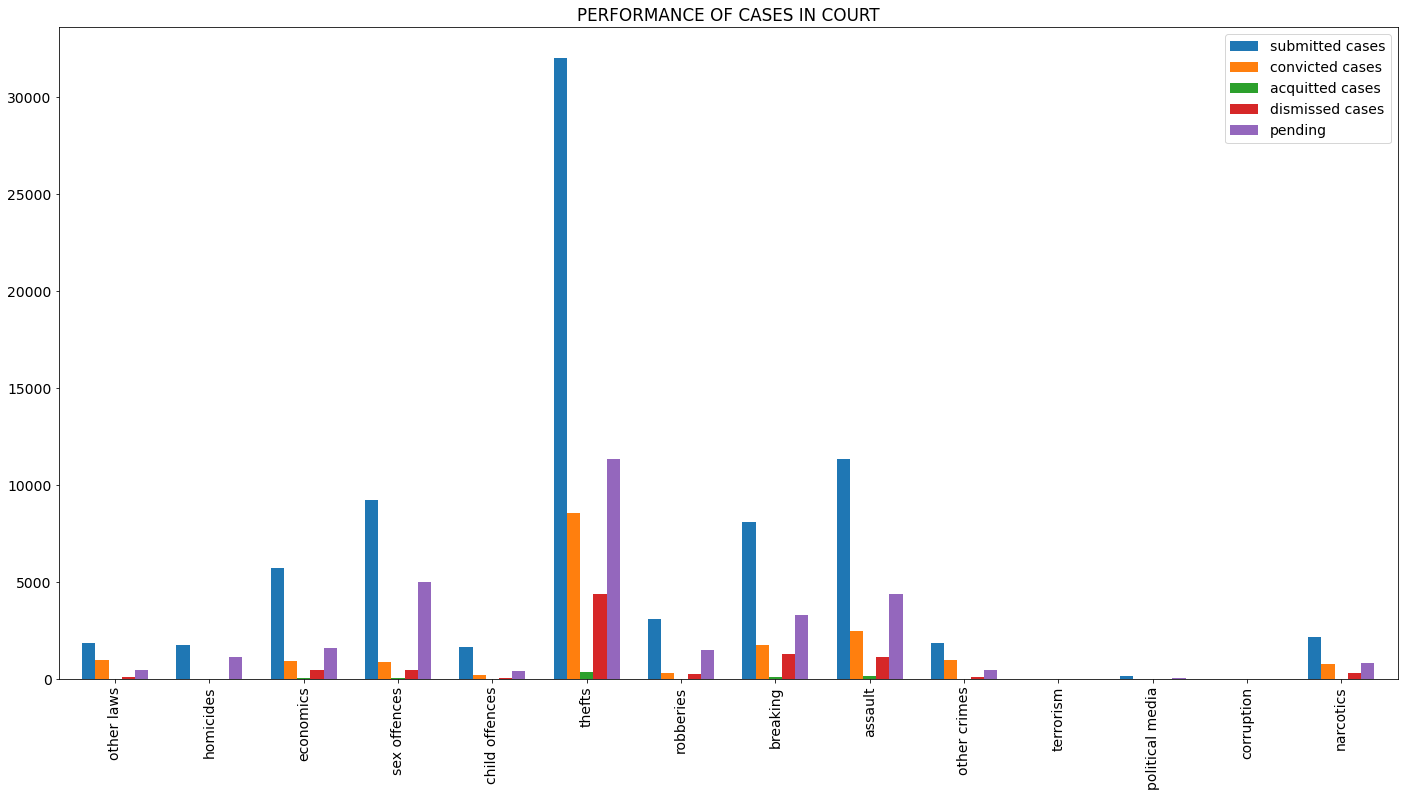

In [236]:
df5.plot.bar(width=0.7,figsize=(24,12),title='PERFORMANCE OF CASES IN COURT')